# Face recognition using Deep Learning
In this second part of the third assignment, you will be able to have a look into recent, Deep Learning based , methodologies for face recognition.

Similar to assignment 2, you will generate an enriched representation of faces that you can use in simple or more complicated classification algorithms. 

## Metric Learning

Instead of building networks that are trained end-to-end to perform face recognition, metric learning based methods learn a projection of the input data on a low-dimensional vector, such that classification in that lower-dimensional space is much easier and can be performed using simple distance metrics. 

## Two major approaches

In the context of face recognition we can observe two major Deep Learning based approaches since 2014.

1. The first approach was developed and presented in 2014 by researchers at Facebook and is called [DeepFace](https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf) . The major contributions where a CDNN to classify faces. In addition a 3D/2D alignment procedure is applied prior to classification. 
The CDNN is trained as a classifier on the SFC (Social Face Classification) dataset, which is a very large (4.4 million image of 4000 individuals) dataset. This setting is called supervised.  The challenge is whether this can also be generalizd to other datasets and subjects as well. By training it on the large collection of uncontrolled images, an embedded representation (the vector description prior to the classification layer) can be generated that is, allegedly, generalizable to other face recognition data. One can then use this representation as we have previously done for classical representations. 
By way of demonstration they tested it on the LFW dataset to achieve >0.95% verification accuracy. 

2. In the same paper they also tested a [siamese network](https://en.wikipedia.org/wiki/Siamese_network) DNN architecture for generating embedded vector representations.  This consists of two copies of the same CNN (sharing their weights) that are applied to pairs of images. During training the distance between the embedded representations of the same individual is minimized, and the distances between embedded representations of different individuals is maximized. In the mean time, this work was extended, steadily increasing the performance. Siamese networks are an example of *One-shot Learning* where you tyically have very few samples per object or dynamically changing number of objects/subjects. While [this link](https://towardsdatascience.com/one-shot-learning-with-siamese-networks-using-keras-17f34e75bb3d) tests it on a non-face recognition task, it can be applied to face recognition as well (see the *Siamese for ATT* notebook included).


3. The second approach was developed by researchers at Google.  An in-depth presentation of their FaceNet/OpenFace deep CNN's for metric embedding of faces is given by [Martin Krasser et al](http://krasserm.github.io/2018/02/07/deep-face-recognition/). Note that this method was trained on 200 million images of eight million identities. The main methodological point is that these networks are trained using a special loss-function: the triplet loss function. 
>This function is minimized when the distance between an anchor image $x_{ai}$ and a positive image $x_{pi}$ (same identity) in embedding space is smaller than the distance between that anchor image and a negative image $x_{ni}$ (different identity) by at least a margin $\alpha$. Model training aims to learn an embedding f(x) of image x such that the squared L2 distance between all faces of the same identity is small and the distance between a pair of faces from different identities is large. 

From the [Dlib face_recognition.py](https://github.com/davisking/dlib/blob/master/python_examples/face_recognition.py) code, we get an application view of the embedding:

> This example shows how to use dlib's face recognition tool.  This tool maps an image of a human face to a 128 dimensional vector space where images of the same person are near to each other and images from different people are far apart.  Therefore, you can perform face recognition by mapping faces to the 128D space and then checking if their Euclidean distance is small enough. 

> When using a distance threshold of 0.6, the dlib model obtains an accuracy of 99.38% on the standard LFW face recognition benchmark, which is comparable to other state-of-the-art methods for face recognition as of February 2017. This accuracy means that, when presented with a pair of face images, the tool will correctly identify if the pair belongs to the same person or is from different people 99.38% of the time.



## Implementations

1. There are two main Python implementations available of the FaceNet/OpenFace approach. 
  * The first is used in [this PyImageSearch tutorial](https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/) and explicitly includes the Dlib package with the [face_recognition modules](https://face-recognition.readthedocs.io/en/latest/index.html) for face detection and recognition. Especially the latter package provides a very convenient interface. 
  * The second implementation is presented in [this PyImageSearch-tutorial](https://www.pyimagesearch.com/2018/09/24/opencv-face-recognition/) and follows a pure OpenCV implementation. I leave it up to you which implementation you follow. 

2. The included *Siamese on ATT* Notebook  shows in more detail how to implement and train a (simplified admittedly) siamese network for face recognition on a particular database. 

3. In the included DeepFace subdirectory you can find the complete DNN, including training, for the interested to play with in your spare time, but it is not part of this assignment. It, accidentally, also contains interesting code for validation and visualization at the end. With proper referencing you can re-use this code. 

![DeepFace Acrchitecture](images/DeepFaceDNN.tiff "DeepFace Architecture")

## Implement and validate

Test (verification/identification), as you did for the Eigenfaces/LDA/LBP approaches, the two approaches (FaceNet, Siamese networks) on the three databases. 

* For the FaceNet/Openface approach you can use the networks (and their weights, no re-training) to calculate the generalized embedding and continue from their on with the conventional verification/identification testing. 
* For the DeepFace approach using the one-shot learning siamese networks, apply it to the three databases if computationally feasible. 


## FaceNet/Openface

### Embedding

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import face_recognition
import argparse
import pickle
import cv2
import os
from localmodules.datasets import load_faces
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

In [3]:
caltechDataset = Path("./CalTechFacesDirs")

max_persons = None
faces_att = load_faces("ATT", dataset = None, min_faces=10, max_targets=max_persons)
faces_lfw = load_faces("LFW", dataset = None, min_faces=10, max_targets=max_persons)
faces_cal = load_faces("CALTECH", dataset = caltechDataset, min_faces=10, max_targets=max_persons)

le = LabelEncoder()
y_att = le.fit_transform(faces_att.target)
y_lfw = le.fit_transform(faces_lfw.target)
y_cal = le.fit_transform(faces_cal.target)


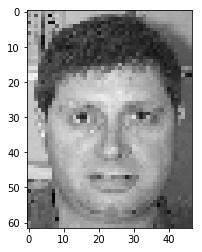

In [11]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(faces_cal.images[0], cv2.COLOR_GRAY2RGB))
plt.show()

In [2]:
!git clone https://github.com/TessFerrandez/research-papers.git

Cloning into 'research-papers'...


In [13]:
# from DeepFace.facerecognitionmaster import utils
from DeepFace.facerecognitionmaster.model import create_model
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('./DeepFace/facerecognitionmaster/weights/nn4.small2.v1.h5')

In [16]:
def generate_embedding(images, db):
    embedded = []
    for i in range(len(images)):
    
        img = (images[i] / 255.).astype(np.float32)
        img = cv2.resize(img, (96,96))
       
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        embedding = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
        embedded.append(embedding)

        
    return embedded

In [17]:
embedded_att = generate_embedding(faces_att.images, 'att')
embedded_cal = generate_embedding(faces_cal.images, 'cal')
embedded_lfw = generate_embedding(faces_lfw.images, 'lfw')

In [18]:
from localmodules.distance import L2_distance, show_pair

def comp_pairwise(embedded, n_samples,  y):
    distances = [] # distance between pairs
    identical = [] # 1 if same identity, 0 otherwise
    # num = n_samples
    I = np.zeros((n_samples, n_samples))

    for i in range(n_samples-1):
        for j in range(1, n_samples):
            
          
                # Euclidean norm as distance
            distances.append(L2_distance(embedded[i], embedded[j]))
            if y[i] == y[j]:
                identical.append(1)
                I[i,j] =  I[j,i] = 1
            else:
                identical.append(0)

    distances = np.array(distances)
    # convert to normalized [0,1] score (the higher the better) swap?
    scores = (distances.max() - distances)/distances.max()
    identical = np.array(identical)
#     print(len(scores))
#     print(distances)
#     print(identical)
    return scores, distances, identical, I

In [19]:
scores_att, distances_att, identical_att, I_att= comp_pairwise(embedded_att, len(embedded_att), y_att)
scores_cal, distances_cal, identical_cal, I_cal= comp_pairwise(embedded_cal, len(embedded_cal), y_cal)
scores_lfw, distances_lfw, identical_lfw, I_lfw= comp_pairwise(embedded_lfw, 1000, y_lfw)

In [20]:
def display_pair(faces, embedded, I):
    genuine = np.asarray(np.where(I == 1)).T
    genuine_pair_id = np.random.randint(genuine.shape[0])

    impostor = np.asarray(np.where(I == 0)).T
    impostor_pair_id = np.random.randint(impostor.shape[0])


    show_pair(faces, embedded, genuine[genuine_pair_id][0], genuine[genuine_pair_id][1])
    show_pair(faces, embedded, impostor[impostor_pair_id][0], impostor[impostor_pair_id][1])

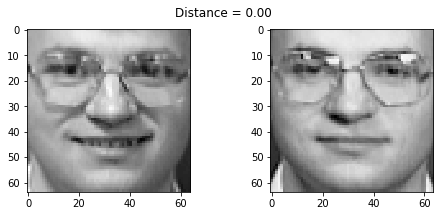

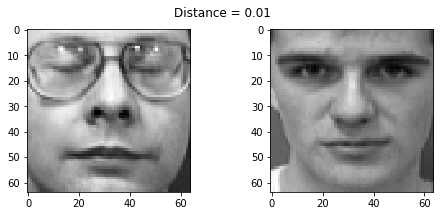

In [21]:
display_pair(faces_att, embedded_att, I_att)

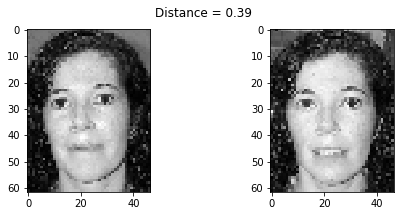

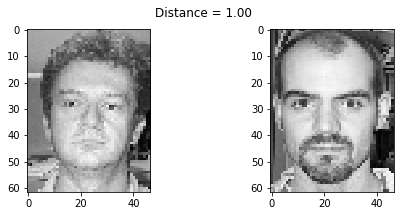

In [22]:
display_pair(faces_cal, embedded_cal, I_cal)

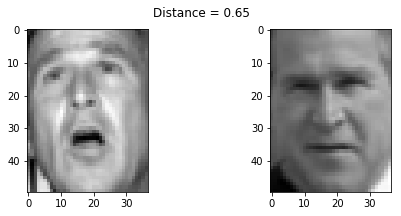

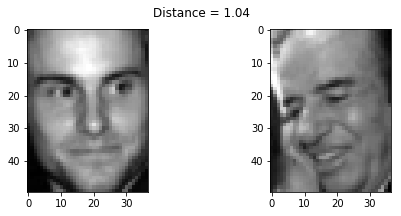

In [23]:
display_pair(faces_lfw, embedded_lfw, I_lfw)

Parkhi et al. - Oxford visual geometry group
VGG-face

In [25]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Flatten, Activation, Dropout
from keras import Model

In [26]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [27]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

In [28]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [34]:
def generate_embedding_deepface(images, db):
    embedded = []
    for i in range(len(images)):
        img = (images[i] / 255.).astype(np.float32)
        img = cv2.resize(img, (224,224))
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        embedding = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0, :]
        embedded.append(embedding)

        
    return embedded

In [30]:
embedded_att_df = generate_embedding_deepface(faces_att.images, 'att')

In [35]:
embedded_cal_df = generate_embedding_deepface(faces_cal.images, 'cal')

In [38]:
embedded_lfw_df = generate_embedding_deepface(faces_lfw.images[:1000], 'lfw')

In [39]:
scores_att_df, distances_att_df, identical_att_df, I_att_df = comp_pairwise(embedded_att_df, len(embedded_att_df), y_att)
scores_cal_df, distances_cal_df, identical_cal_df, I_cal_df = comp_pairwise(embedded_cal_df, len(embedded_cal_df), y_cal)
scores_lfw_df, distances_lfw_df, identical_lfw_df, I_lfw_df = comp_pairwise(embedded_lfw_df, 1000, y_lfw)

In [40]:
from sklearn.metrics import f1_score, accuracy_score
from matplotlib import pyplot as plt
def show_metrics(scores, identical, show, title):
    # set threshold range
    thresholds =  np.arange(0,1,0.03)

    f1_scores = []
    acc_scores = []
    for th in thresholds:
        scores_th = np.where(scores > th, 1, 0)
        f1_scores.append(f1_score(identical, scores_th))
        acc_scores.append(accuracy_score(identical, scores_th))


    # Determine optimal Threshold 
    # ...
    opt_tau = thresholds[np.argmax(f1_scores)]
    # ...
    print(opt_tau)

    # Plot F1 score and accuracy as function of distance threshold
    if show:
        plt.scatter(thresholds, f1_scores, c='b', label='F1 scores')
        plt.scatter(thresholds, acc_scores, c='r', label='accuracy scores')
        plt.legend()
        plt.xlabel('threshold')
        plt.xlabel('score')
        plt.title(title)
        plt.show()
    return opt_tau

0.84


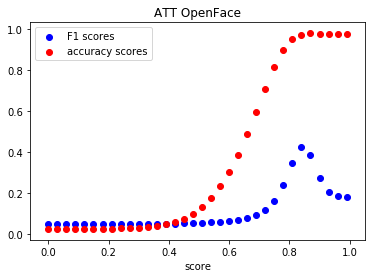

0.6599999999999999


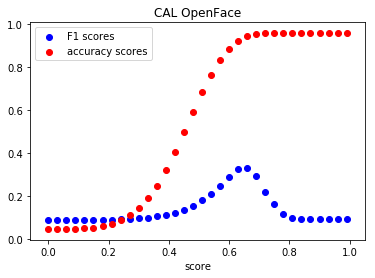

0.63


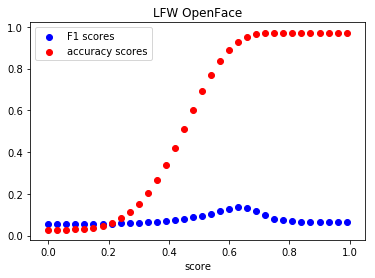

0.6599999999999999


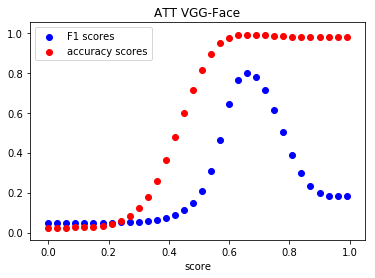

0.63


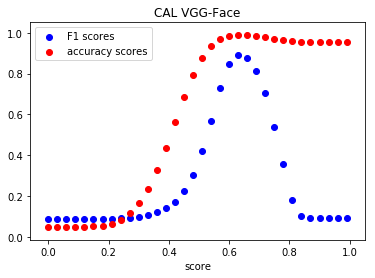

0.6599999999999999


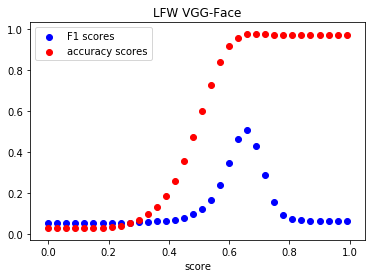

In [71]:
opt_tau_att = show_metrics(scores_att, identical_att, show=True, title='ATT OpenFace')
opt_tau_cal = show_metrics(scores_cal, identical_cal, show=True, title='CAL OpenFace')
opt_tau_lfw = show_metrics(scores_lfw, identical_lfw, show=True, title='LFW OpenFace')

opt_tau_att_df = show_metrics(scores_att_df, identical_att_df, show=True, title='ATT VGG-Face')
opt_tau_cal_df = show_metrics(scores_cal_df, identical_cal_df, show=True, title='CAL VGG-Face')
opt_tau_lfw_df = show_metrics(scores_lfw_df, identical_lfw_df, show=True, title='LFW VGG-Face')

In [42]:
def show_genuine_impostor(scores, identical, opt_tau, name):
    gen = scores[np.where(identical==1)]
    imp = scores[np.where(identical==0)]
    plt.hist(gen, density=False, bins=50, label='genuine')
    plt.hist(imp, density=False, alpha=0.5, bins=50, label='impostor')
    plt.legend()
    plt.xlabel('score')
    plt.ylabel('number')
    plt.axvline(x=opt_tau, color='r', linestyle='--')
    plt.title(name)
    plt.show()

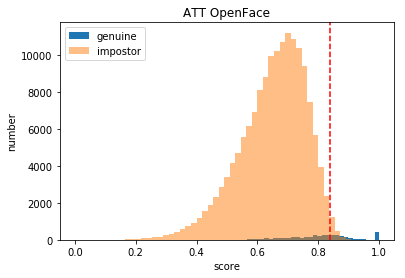

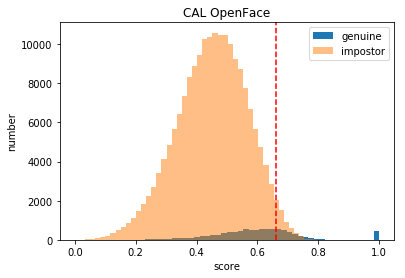

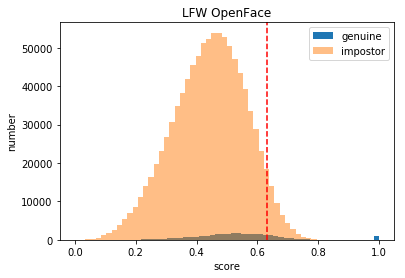

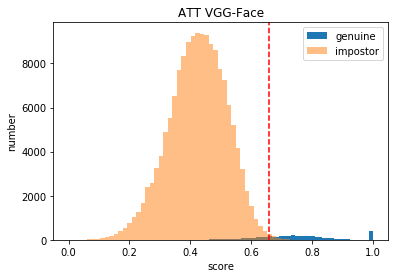

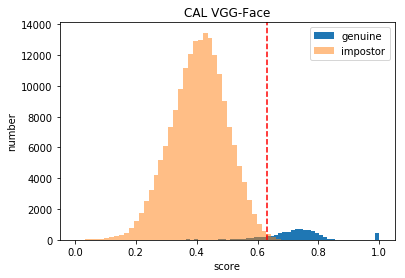

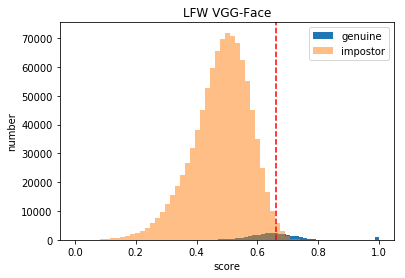

In [72]:
show_genuine_impostor(scores_att, identical_att, opt_tau_att, 'ATT OpenFace')
show_genuine_impostor(scores_cal, identical_cal, opt_tau_cal, 'CAL OpenFace')
show_genuine_impostor(scores_lfw, identical_lfw, opt_tau_lfw, 'LFW OpenFace')

show_genuine_impostor(scores_att_df, identical_att_df, opt_tau_att_df, 'ATT VGG-Face')
show_genuine_impostor(scores_cal_df, identical_cal_df, opt_tau_cal_df, 'CAL VGG-Face')
show_genuine_impostor(scores_lfw_df, identical_lfw_df, opt_tau_lfw_df, 'LFW VGG-Face')

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def show_roc(scores_arr, identical_arr, names):
    EER_arr = []
    plt.title('Receiver Operating Characteristic')
    
    plt.plot([0, 1], [1, 0],'r--')
    plt.plot([0, 1], [0, 1],'k-')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    colors = ['b','g','r']
    for i in range(len(scores_arr)):
        fpr, tpr, threshold = roc_curve(identical_arr[i], scores_arr[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, colors[i], linewidth=8, label = '%s AUC = %0.3f' % (names[i],roc_auc))
        fnr = 1 - tpr

        eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
        EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
        EER2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
        print("%s Equal error rate: %.3f" % (names[i], EER))
        EER_arr.append(EER)
    plt.legend(loc = 'lower right')
    plt.show()

    
    return EER_arr

ATT OpenFace Equal error rate: 0.246
Cal OpenFace Equal error rate: 0.275
LFW OpenFace Equal error rate: 0.368


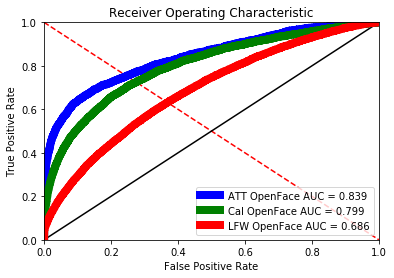

ATT VGG-Face Equal error rate: 0.069
Cal VGG-Face Equal error rate: 0.050
LFW VGG-Face Equal error rate: 0.141


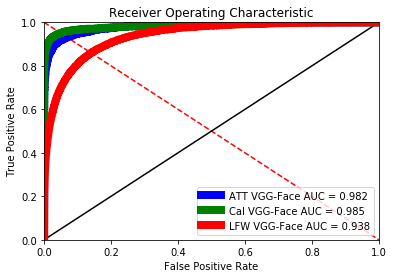

In [46]:
[EER_att, EER_cal, EER_lfw] = show_roc([scores_att, scores_cal, scores_lfw], \
                       [identical_att, identical_cal, identical_lfw], \
                                                  ['ATT OpenFace', 'Cal OpenFace', 'LFW OpenFace'])

[EER_att_df, EER_cal_df, EER_lfw_df] = show_roc([scores_att_df, scores_cal_df, scores_lfw_df], \
                       [identical_att_df, identical_cal_df, identical_lfw_df], \
                                                  ['ATT VGG-Face', 'Cal VGG-Face', 'LFW VGG-Face'])


ATT OpenFace Equal error rate: 0.246
ATT VGG-Face Equal error rate: 0.069


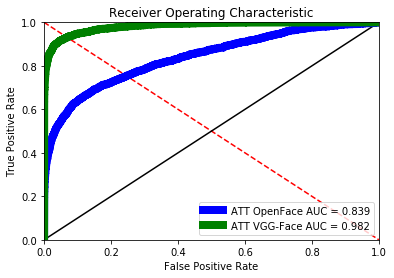

Cal OpenFace Equal error rate: 0.275
Cal VGG-Face Equal error rate: 0.050


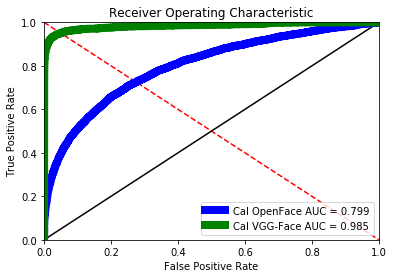

LFW OpenFace Equal error rate: 0.368
LFW VGG-Face Equal error rate: 0.141


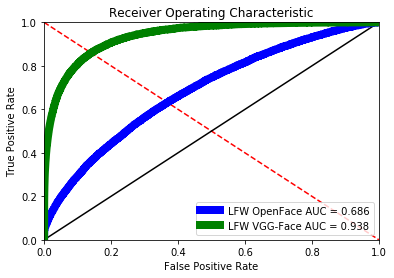

In [54]:
[EER_att, EER_att_df] = show_roc([scores_att, scores_att_df], \
                       [identical_att, identical_att_df], \
                                                  ['ATT OpenFace', 'ATT VGG-Face'])

[EER_cal, EER_cal_df] = show_roc([scores_cal, scores_cal_df], \
                       [identical_cal, identical_cal_df], \
                                                  ['Cal OpenFace', 'Cal VGG-Face'])

[EER_lfw, EER_lfw_df] = show_roc([scores_lfw, scores_lfw_df], \
                       [identical_lfw, identical_lfw_df], \
                                                  ['LFW OpenFace', 'LFW VGG-Face'])

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

def show_precision_recall(scores_arr, identical_arr, opt_tau_arr, names):
    colors = ['b','g','r']
    for i in range(len(scores_arr)):
        precision, recall, thresholds = precision_recall_curve(identical_arr[i], scores_arr[i])
        scores_th = np.where(scores_arr[i] > opt_tau_arr[i], 1, 0)
        f1 = f1_score(identical_arr[i], scores_th)

        auc_ = auc(recall, precision)

        ap = average_precision_score(identical_arr[i], scores_arr[i])
        print('%s f1=%.3f auc=%.3f ap=%.3f' % (names[i], f1, auc_, ap))
        plt.plot(recall, precision, colors[i], marker='.',linewidth=3, label = '%s AUC = %0.3f' % (names[i], auc_))
    plt.legend(loc = 'lower left')
    plt.xlabel('recall', fontsize=16)
    plt.ylabel('precision', fontsize=16)
    plt.plot([0, 1], [0.5, 0.5], 'k--') 
    plt.show()

ATT OpenFace f1=0.425 auc=0.423 ap=0.423
Cal OpenFace f1=0.330 auc=0.310 ap=0.310
LFW OpenFace f1=0.136 auc=0.114 ap=0.114


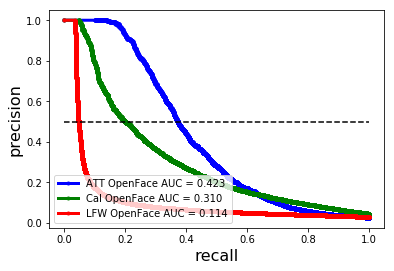

ATT VGG-Face f1=0.800 auc=0.859 ap=0.859
Cal VGG-Face f1=0.890 auc=0.933 ap=0.933
LFW VGG-Face f1=0.508 auc=0.543 ap=0.543


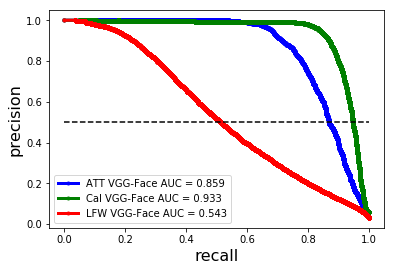

In [55]:
show_precision_recall([scores_att, scores_cal, scores_lfw], \
                       [identical_att, identical_cal, identical_lfw], \
                      [opt_tau_att, opt_tau_cal, opt_tau_lfw], \
                                                  ['ATT OpenFace', 'Cal OpenFace', 'LFW OpenFace'])

show_precision_recall([scores_att_df, scores_cal_df, scores_lfw_df], \
                       [identical_att_df, identical_cal_df, identical_lfw_df], \
                      [opt_tau_att_df, opt_tau_cal_df, opt_tau_lfw_df], \
                                                  ['ATT VGG-Face', 'Cal VGG-Face', 'LFW VGG-Face'])

ATT OpenFace f1=0.425 auc=0.423 ap=0.423
ATT VGG-Face f1=0.800 auc=0.859 ap=0.859


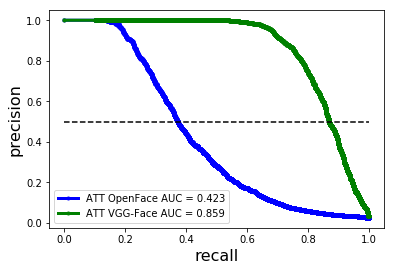

Cal OpenFace f1=0.330 auc=0.310 ap=0.310
Cal VGG-Face f1=0.890 auc=0.933 ap=0.933


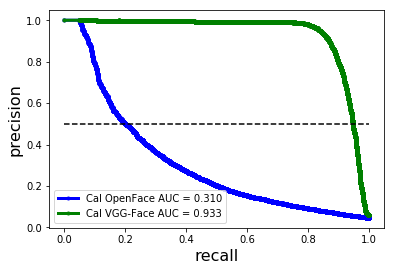

LFW OpenFace f1=0.136 auc=0.114 ap=0.114
LFW VGG-Face f1=0.508 auc=0.543 ap=0.543


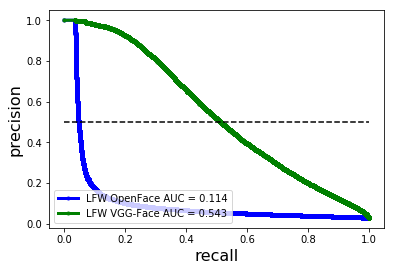

In [56]:
show_precision_recall([scores_att, scores_att_df], \
                       [identical_att, identical_att_df], \
                      [opt_tau_att, opt_tau_att_df], \
                                                  ['ATT OpenFace', 'ATT VGG-Face'])

show_precision_recall([scores_cal, scores_cal_df], \
                       [identical_cal, identical_cal_df], \
                      [opt_tau_cal, opt_tau_cal_df], \
                                                  ['Cal OpenFace', 'Cal VGG-Face'])

show_precision_recall([scores_lfw, scores_lfw_df], \
                       [identical_lfw, identical_lfw_df], \
                      [opt_tau_lfw, opt_tau_lfw_df], \
                                                  ['LFW OpenFace', 'LFW VGG-Face'])

In [64]:
from CMC import CMC
def get_ranks(rank, n_samples, y,  embedded):

    indexes = []

    for i in range(n_samples):
        true_label = y[i]
        dist = []
        labels_ind = []
        for j in range(n_samples):
            if i != j:

                
                dist.append(L2_distance(embedded[i], embedded[j]))

                labels_ind.append(y[j])


        s = [x for _, x in sorted(zip(dist, labels_ind))]
        try:
            index = s.index(true_label)
        except: 
            index = rank+1
        indexes.append(index+1)

    ranks = []
    c = 0
    for i in range(1,rank+1):
        c += indexes.count(i)
        ranks.append(c/len(indexes))

    return ranks

In [65]:
ranks_att = get_ranks(20, len(embedded_att), y_att, embedded_att)
ranks_cal = get_ranks(20, len(embedded_cal), y_cal,  embedded_cal)
ranks_lfw = get_ranks(50, 1000, y_lfw[:1000], embedded_lfw)

In [66]:
ranks_att_df = get_ranks(20, len(embedded_att_df), y_att, embedded_att_df)
ranks_cal_df = get_ranks(20, len(embedded_cal_df), y_cal,  embedded_cal_df)
ranks_lfw_df = get_ranks(50, 1000, y_lfw[:1000], embedded_lfw_df)

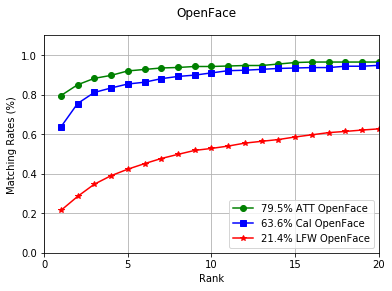

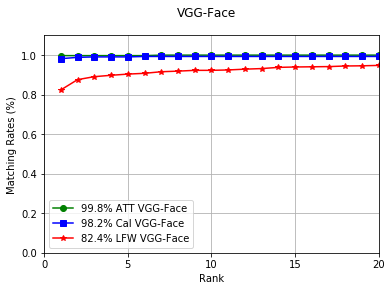

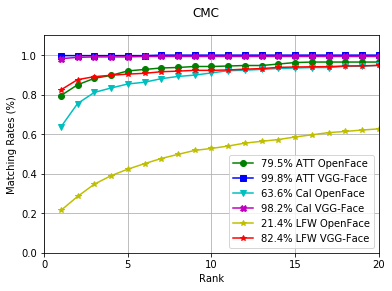

In [70]:
cmc_dict ={'ATT OpenFace': ranks_att,
          'Cal OpenFace': ranks_cal,
          'LFW OpenFace': ranks_lfw}
cmc = CMC(cmc_dict)
cmc.plot(title='OpenFace')

cmc_dict ={'ATT VGG-Face': ranks_att_df,
          'Cal VGG-Face': ranks_cal_df,
          'LFW VGG-Face': ranks_lfw_df}
cmc = CMC(cmc_dict)
cmc.plot(title='VGG-Face')

cmc_dict ={'ATT OpenFace': ranks_att,
          'ATT VGG-Face': ranks_att_df,
           'Cal OpenFace': ranks_cal,
          'Cal VGG-Face': ranks_cal_df,
           'LFW OpenFace': ranks_lfw,
          'LFW VGG-Face': ranks_lfw_df
         }
cmc = CMC(cmc_dict)
cmc.plot(title='CMC')